In [178]:
import mne
import numpy as np
import matplotlib.pyplot as plt

# Import the FOOOF object
from fooof import FOOOF
from fooof import FOOOFGroup

# Import a utility to download and load example data
from fooof.utils.download import load_fooof_data

import mne
import numpy as np
import os
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from spiketools.plts.utils import make_axes

import imagesc as imagesc

import warnings
warnings.filterwarnings("ignore")

In [3]:
# folder of the results
path_files = Path('/home/b1044271/Columbia/Results/FOOOF/Cz')

# Get names of all subject folder
sbj_folders = list(path_files.iterdir())
sbj_folders = sorted(sbj_folders)

In [184]:
# Get the fooof results for each subject
Stages   = ['N1','N2','N3','AW','RM']
nfm      = FOOOF()
nfm2     = FOOOF()
knee_arr = pd.DataFrame(np.nan,index=range(len(Stages)),columns=range(len(filesF)))
Nknee_arr = pd.DataFrame(np.nan,index=range(len(Stages)),columns=range(len(filesF)))

iii = 0
for stage in Stages:
    i = 0
    S_arr = pd.DataFrame(np.nan,index=range(len(sbj_folders)),columns=range(len(filesF)))
    NS_arr = pd.DataFrame(np.nan,index=range(len(sbj_folders)),columns=range(len(filesF)))
    for subj in sbj_folders:
        path1 = subj / stage / 'Knee'
        filesF = list(path1.iterdir())
        path2 = subj / stage / 'NoKnee'
        filesF2 = list(path2.iterdir())
        
        ii=0
        for F in filesF:
            nfm.load(os.path.basename(F) , str(path1))
            S_arr.iloc[[i],[ii]] = nfm.r_squared_
            ii = ii+1
            
        ii=0    
        for F2 in filesF2:
            nfm2.load(os.path.basename(F2) , str(path2))
            NS_arr.iloc[[i],[ii]] = nfm2.r_squared_
            ii = ii+1
        i = i+1
        
    knee_arr.iloc[[iii],0:20] = list(S_arr.mean(axis=0))
    Nknee_arr.iloc[[iii],0:20] = list(NS_arr.mean(axis=0))
    iii = iii +1                                        

In [185]:
# The knee_arr / Nknee_arr dataframes contain th r2 averaged over all subjects per stage
# now we can mean over stages or use each stage separately (up to you) 
# here i'm gonna mean over all stages for an overall sensitivity matrix
K_R2_all = list(knee_arr.mean(axis=0))
NK_R2_all = list(Nknee_arr.mean(axis=0))

Knee_av_final = np.reshape(K_R2_all, (5, 4)).T
NKnee_av_final = np.reshape(NK_R2_all, (5, 4)).T

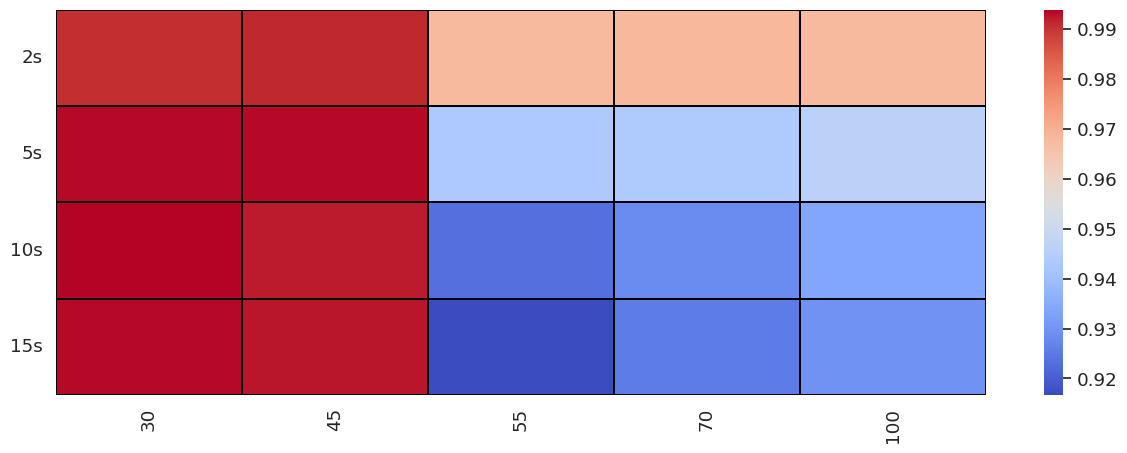

In [186]:
# Now the arrays are ready for plotting 
data_s = pd.DataFrame(Knee_av_final,columns=['30','45','55','70','100'], index=['2s','5s','10s','15s'])
fig, ax = imagesc.seaborn(data_s.values, data_s.index.values, data_s.columns.values)

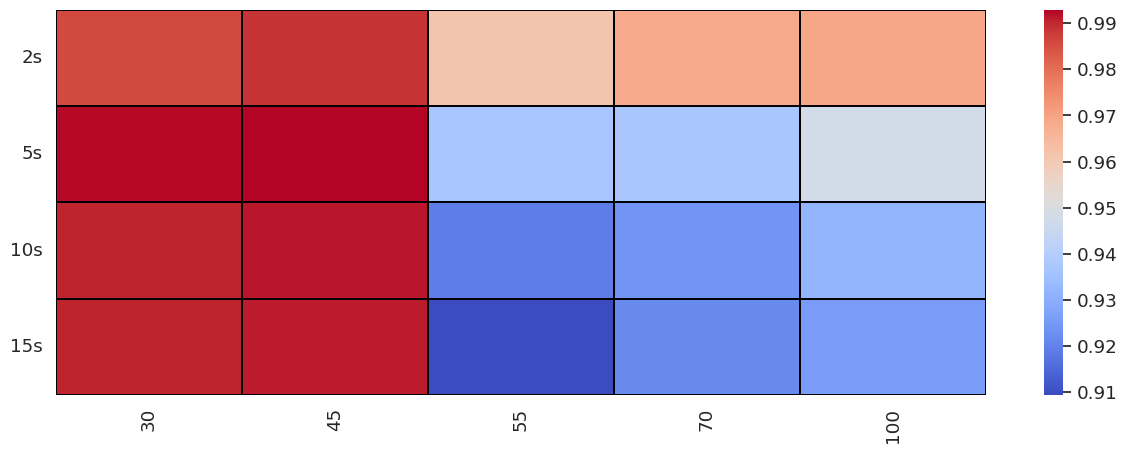

In [187]:
# Now the arrays are ready for plotting 
data_s = pd.DataFrame(NKnee_av_final,columns=['30','45','55','70','100'], index=['2s','5s','10s','15s'])
fig, ax = imagesc.seaborn(data_s.values, data_s.index.values, data_s.columns.values)

In [181]:
NKnee_av_final

array([[0.9295763, 0.9295763, 0.9295763, 0.9295763, 0.9295763],
       [0.9295763, 0.9295763, 0.9295763, 0.9295763, 0.9295763],
       [0.9295763, 0.9295763, 0.9295763, 0.9295763, 0.9295763],
       [0.9295763, 0.9295763, 0.9295763, 0.9295763, 0.9295763]])

In [174]:
filesF2

[PosixPath('/home/b1044271/Columbia/Results/FOOOF/Cz/VP19/RM/NoKnee/VP19_RM_T2_F30_NoKnee.json'),
 PosixPath('/home/b1044271/Columbia/Results/FOOOF/Cz/VP19/RM/NoKnee/VP19_RM_T5_F30_NoKnee.json'),
 PosixPath('/home/b1044271/Columbia/Results/FOOOF/Cz/VP19/RM/NoKnee/VP19_RM_T10_F30_NoKnee.json'),
 PosixPath('/home/b1044271/Columbia/Results/FOOOF/Cz/VP19/RM/NoKnee/VP19_RM_T15_F30_NoKnee.json'),
 PosixPath('/home/b1044271/Columbia/Results/FOOOF/Cz/VP19/RM/NoKnee/VP19_RM_T2_F45_NoKnee.json'),
 PosixPath('/home/b1044271/Columbia/Results/FOOOF/Cz/VP19/RM/NoKnee/VP19_RM_T5_F45_NoKnee.json'),
 PosixPath('/home/b1044271/Columbia/Results/FOOOF/Cz/VP19/RM/NoKnee/VP19_RM_T10_F45_NoKnee.json'),
 PosixPath('/home/b1044271/Columbia/Results/FOOOF/Cz/VP19/RM/NoKnee/VP19_RM_T15_F45_NoKnee.json'),
 PosixPath('/home/b1044271/Columbia/Results/FOOOF/Cz/VP19/RM/NoKnee/VP19_RM_T2_F55_NoKnee.json'),
 PosixPath('/home/b1044271/Columbia/Results/FOOOF/Cz/VP19/RM/NoKnee/VP19_RM_T5_F55_NoKnee.json'),
 PosixPath('/hom